In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR

# 0523

#### 정리

- boosting : tree들 combine 시 예측성 높은 tree에 가중치 둠 -> overfitting 가능성
- bagging = boostraping : equal weight (generalize 되는 장점) -> tree 들 끼리 uncorrelated / train set 전체 x 변수 다 이용해서 tree bagging -> 원데이터와 유사한 데이터가 만들어질 가능성이 크다.
- random forest : train set의 일부분을 무작위로 bagging 함 -> m=sqrt(p) 개 가지고 tree 만듦. -> overfitting 가능성 줄음 -> uncorrelated 된 나무 만들기 위함 / 대규모 데이터에서 적절하다. 

- RandomForestClassifier : y가 범주형일 때
- RandomForestRegressor : y가 연속형일 때

- max_features=None -> bagging
- max_features='auto', max_samples=0.66 -> random forest

- mean_squared_error : y가 연속형
- confusion_matrix : y가 범주형



## Classification
## y가 범주형인 경우 -> confusion_matrix(y_test,pred)

In [3]:
data1=np.array([3,4,5,6,7,8,9])
data1

array([3, 4, 5, 6, 7, 8, 9])

In [4]:
# with replacement

np.random.seed(0)
np.random.choice(data1,size=10,replace=True)

array([7, 8, 3, 6, 6, 6, 4, 6, 8, 5])

In [5]:
np.random.choice(data1,size=10,replace=True)

array([7, 9, 3, 3, 7, 5, 4, 9, 9, 3])

In [6]:
np.random.choice(data1,size=10,replace=True)

array([4, 8, 4, 8, 3, 4, 7, 6, 3, 6])

In [7]:
np.random.choice(data1,size=3,replace=True)

array([8, 9, 3])

In [8]:
data2="c:/temp/iris.csv"
iris=pd.read_csv(data2)
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
np.random.seed(0)
iris_100=iris.iloc[np.random.randint(150,size=100)]
iris_100

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
47,4.6,3.2,1.4,0.2,setosa
117,7.7,3.8,6.7,2.2,virginica
67,5.8,2.7,4.1,1.0,versicolor
103,6.3,2.9,5.6,1.8,virginica
9,4.9,3.1,1.5,0.1,setosa
...,...,...,...,...,...
138,6.0,3.0,4.8,1.8,virginica
114,5.8,2.8,5.1,2.4,virginica
43,5.0,3.5,1.6,0.6,setosa
127,6.1,3.0,4.9,1.8,virginica


In [10]:
# Bagging
# train test split

X=iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y=iris['Species']

In [11]:
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)
X_train

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [14]:
X_test

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


In [15]:
150*0.7

105.0

In [16]:
# Bagging 해보자

bag1=RandomForestClassifier(n_estimators=10,max_features=None,random_state=0,max_depth=2)
bag1

RandomForestClassifier(max_depth=2, max_features=None, n_estimators=10,
                       random_state=0)

In [17]:
result1=bag1.fit(X_train,y_train)
result1

RandomForestClassifier(max_depth=2, max_features=None, n_estimators=10,
                       random_state=0)

In [18]:
pred1=result1.predict(X_test)
pred1

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [19]:
confusion_matrix(y_test,pred1)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  3,  8]], dtype=int64)

In [20]:
# CCR
(16+17+8)/(16+17+8+3+1)

0.9111111111111111

In [21]:
bag2=RandomForestClassifier(n_estimators=100,max_features=None,random_state=0,max_depth=2)
bag2

RandomForestClassifier(max_depth=2, max_features=None, random_state=0)

In [22]:
result2=bag2.fit(X_train,y_train)
pred2=result2.predict(X_test)
confusion_matrix(y_test,pred2)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 10]], dtype=int64)

In [23]:
bag3=RandomForestClassifier(n_estimators=500,max_features=None,random_state=0,max_depth=2)
result3=bag3.fit(X_train,y_train)
pred3=result3.predict(X_test)
confusion_matrix(y_test,pred3)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [24]:
# tree가 많아진다고 해도 예측성과가 크게 좋아지는것은 아님

In [25]:
# Random Forest

rf4=RandomForestClassifier(n_estimators=10,max_features='auto',max_samples=0.66,random_state=0,max_depth=2)
result4=rf4.fit(X_train,y_train)
pred4=result4.predict(X_test)
confusion_matrix(y_test,pred4)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 10]], dtype=int64)

In [26]:
# CCR
(16+17+10)/(16+17+10+1+1)

0.9555555555555556

## Regressor
## y가 연속형인 경우 -> mean_squared_error(y_test,pred)

In [27]:
file3="c:/temp/Boston.csv"
data3=pd.read_csv(file3)
data3

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [28]:
X=data3.drop('medv',axis=1)
y=data3['medv']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

In [29]:
# bagging
bag5=RandomForestRegressor(n_estimators=100,max_features=None,random_state=0,max_depth=3)
result5=bag5.fit(X_train,y_train)
pred5=result5.predict(X_test)
mean_squared_error(y_test,pred5)

17.857767501639618

In [30]:
# Randomforest 

rf6=RandomForestRegressor(n_estimators=100,max_features='auto',max_samples=0.66,random_state=0,max_depth=3)
result6=rf6.fit(X_train,y_train)
pred6=result6.predict(X_test)
mean_squared_error(y_test,pred6)

19.639974504576372

In [31]:
# mean_squared_error 은 작을수록 좋음

In [32]:
# random forest 할 때 x변수 몇개 이용하냐?
np.sqrt(13)

3.605551275463989

In [33]:
# 4개 이용한다. 
# rf가 bagging 보다 mse 가 더 크다. 더 별로인 것

In [34]:
# 그렇다면 random forest 에서 어떤 변수가 중요하게 쓰였냐?
# random forest에서 변수 중요성 측정 방법: VIP
# Variance Importance Index

imp=result6.feature_importances_
imp

array([2.13681757e-02, 4.65869412e-04, 2.89659108e-03, 8.14505090e-04,
       1.32182661e-02, 4.93489561e-01, 4.21119016e-03, 3.02357322e-02,
       2.12648443e-03, 4.74239267e-03, 9.71116968e-03, 3.51993027e-03,
       4.13200132e-01])

In [35]:
# 각 x 변수에 해당하는 vip
# 클 수록 중요한 변수 : 그게 추가되었을때 얼마나 개선되느냐

In [36]:
# bar graph 로 그려서 vip 보자

imp1=pd.DataFrame({'importance':imp},index=X.columns)
imp1

,importance
crim,0.021368
zn,0.000466
indus,0.002897
chas,0.000815
nox,0.013218
rm,0.493490
age,0.004211
dis,0.030236
rad,0.002126
tax,0.004742


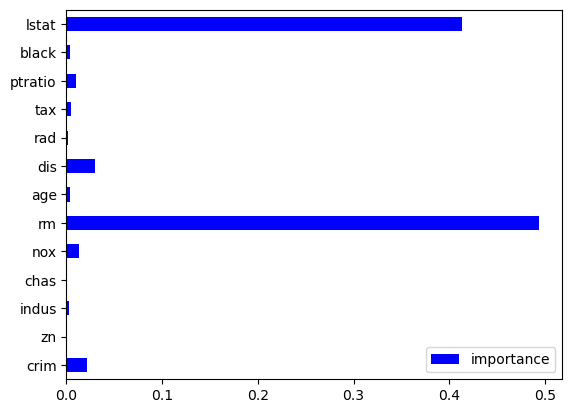

In [37]:
imp1.plot(kind='barh',color='blue')
plt.show()

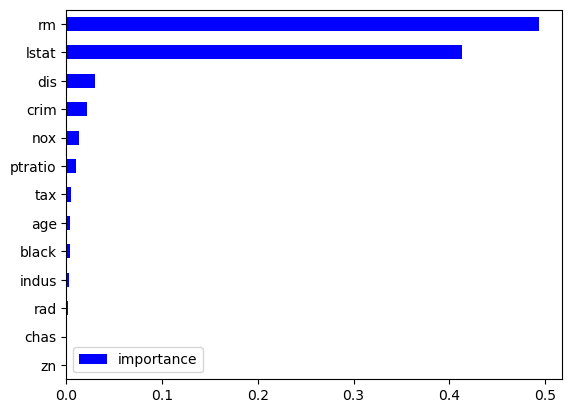

In [38]:
imp1.sort_values('importance',ascending=True,inplace=True)
imp1.plot(kind='barh',color='blue')
plt.show()

In [39]:
imp1

,importance
zn,0.000466
chas,0.000815
rad,0.002126
indus,0.002897
black,0.003520
age,0.004211
tax,0.004742
ptratio,0.009711
nox,0.013218
crim,0.021368
